In [1]:
pip install opendatasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadarhamzafar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset


100%|██████████| 121M/121M [00:00<00:00, 762MB/s] 

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data_dir = '/content/face-expression-recognition-dataset/images/images'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [6]:
# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


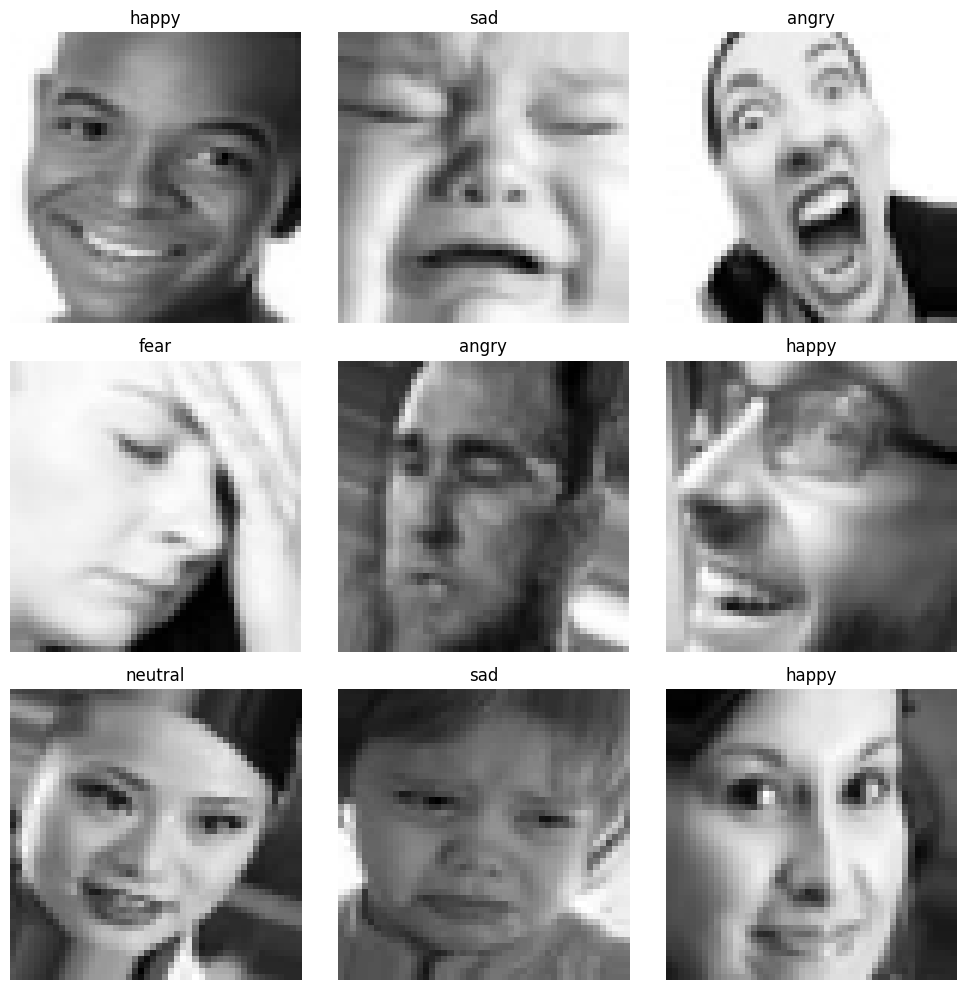

In [7]:
class_names = list(train_generator.class_indices.keys())

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# 3. CNN Model Architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Model Training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.2421 - loss: 2.3782 - val_accuracy: 0.2921 - val_loss: 1.8809 - learning_rate: 0.0010
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.3835 - loss: 1.6430 - val_accuracy: 0.4147 - val_loss: 1.5303 - learning_rate: 0.0010
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4406 - loss: 1.4762 - val_accuracy: 0.4530 - val_loss: 1.4078 - learning_rate: 0.0010
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4671 - loss: 1.3949 - val_accuracy: 0.4993 - val_loss: 1.3103 - learning_rate: 0.0010
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4888 - loss: 1.3442 - val_accuracy: 0.4735 - val_loss: 1.3545 - learning_rate: 0.0010
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.4935 - loss: 1.3193 - val_accuracy: 0.5579 - val_loss: 1.1906 - learning_rate: 0.0010
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5094 - loss: 1.2910

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 
              precision    recall  f1-score   support

       angry       0.50      0.71      0.59         7
     disgust       0.50      0.50      0.50         2
        fear       0.43      0.27      0.33        11
       happy       0.94      1.00      0.97        15
     neutral       0.71      0.62      0.67         8
         sad       0.50      0.50      0.50        10
    surprise       0.83      0.91      0.87        11

    accuracy                           0.69        64
   macro avg       0.63      0.65      0.63        64
weighted avg       0.67      0.69      0.67        64



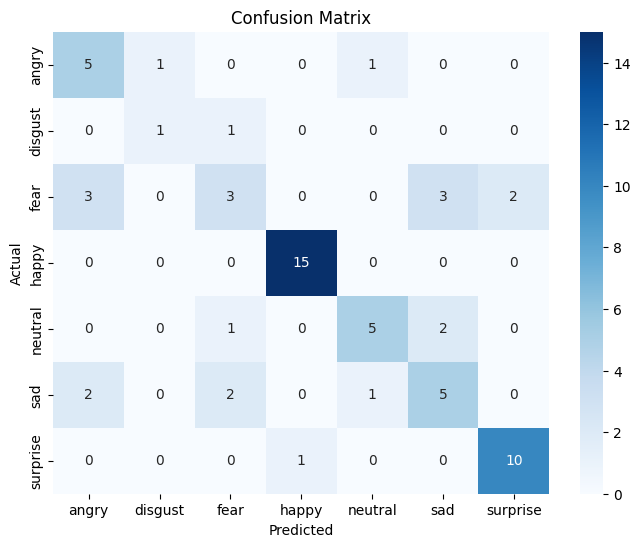

In [10]:
# 6. Evaluation - Classification Report & Confusion Matrix
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


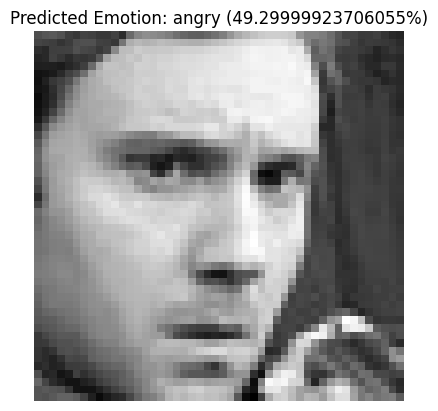

Emotion: angry, Confidence: 49.29999923706055%


In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion('/content/face-expression-recognition-dataset/images/images/train/angry/0.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


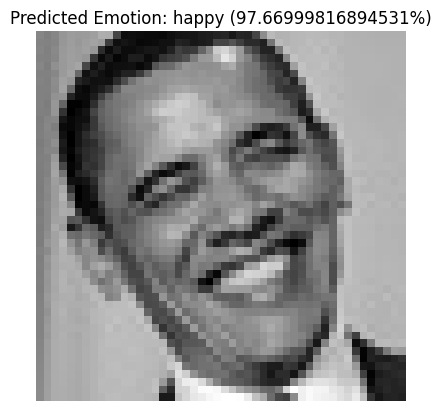

('happy', np.float32(97.67))


In [13]:

# Example Detection
print(detect_emotion('/content/face-expression-recognition-dataset/images/images/train/happy/10000.jpg'))

In [14]:
# 8. Save Model
model.save('facial_emotion_detection_model.h5')

In [15]:
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Task
Create a web application with a user-friendly front-end for emotion detection using the provided Python code, integrating the front-end and back-end seamlessly without errors.

## Choose a web framework

### Subtask:
Select a suitable web framework (e.g., Flask, Django, or Streamlit) to build the front-end.


## Design the user interface

### Subtask:
Design the user interface for the web application using Streamlit.


**Reasoning**:
Design the user interface for the web application using Streamlit by setting the title, adding a description, creating a file uploader, and adding placeholders for the image and prediction results.



In [16]:
import streamlit as st

# 1. Set the title
st.title("Facial Emotion Detection App")

# 2. Add a brief description
st.write("Upload an image to detect the facial emotion.")

# 4. Create a file uploader widget
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# 5. Add a section or placeholder where the uploaded image will be displayed.
# 7. Create a section or placeholder where the predicted emotion and confidence level will be displayed.
# These will be populated later when an image is uploaded and processed.
image_placeholder = st.empty()
prediction_placeholder = st.empty()

# 6. Include a button or trigger that the user will click to initiate the emotion detection process.
# The detection logic will be added after the button is clicked.
if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    # Add a button to trigger prediction
    if st.button("Detect Emotion"):
        # The emotion detection logic will go here in a later step
        prediction_placeholder.write("Detecting emotion...")


ModuleNotFoundError: No module named 'streamlit'

**Reasoning**:
The previous command failed because the `streamlit` library is not installed. Install `streamlit` using pip.



In [17]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.5 MB/s eta 0:00:00


**Reasoning**:
Now that streamlit is installed, retry the previous code block to design the user interface for the web application.



In [18]:
import streamlit as st

# 1. Set the title
st.title("Facial Emotion Detection App")

# 2. Add a brief description
st.write("Upload an image to detect the facial emotion.")

# 4. Create a file uploader widget
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# 5. Add a section or placeholder where the uploaded image will be displayed.
# 7. Create a section or placeholder where the predicted emotion and confidence level will be displayed.
# These will be populated later when an image is uploaded and processed.
image_placeholder = st.empty()
prediction_placeholder = st.empty()

# 6. Include a button or trigger that the user will click to initiate the emotion detection process.
# The detection logic will be added after the button is clicked.
if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    # Add a button to trigger prediction
    if st.button("Detect Emotion"):
        # The emotion detection logic will go here in a later step
        prediction_placeholder.write("Detecting emotion...")

2025-09-03 11:20:55.902 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.549 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-03 11:20:56.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:20:56.555 Thread 'MainThread': mi

## Set up the backend

### Subtask:
Create Python scripts using the chosen framework (Streamlit) to handle image uploads, preprocess the images, and pass them to the trained model for prediction.


**Reasoning**:
Create a Python script to handle image preprocessing for the Streamlit application.



In [19]:
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L') # Convert to grayscale
    img = img.resize((48, 48)) # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0 # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1) # Add channel dimension for grayscale
    return img_array

# This part is for demonstrating the function within the notebook
# In the actual Streamlit app, this function will be called when a file is uploaded.
# To test this function in the notebook, you would need a dummy uploaded_file object.
# Example (requires a dummy file):
# with open("test_image.jpg", "rb") as f:
#     dummy_uploaded_file = f
#     preprocessed_img = load_and_preprocess_image(dummy_uploaded_file)
#     print(preprocessed_img.shape)

**Reasoning**:
The image preprocessing function has been defined. The next step is to integrate this function into the Streamlit UI script to handle uploaded images.



In [20]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()


# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    return img_array

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        # Make prediction using the loaded model
        predictions = model.predict(preprocessed_img)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

        # Display the prediction result
        prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")


2025-09-03 11:21:30.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:21:30.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Integrate the model

### Subtask:
Integrate the trained model into the backend application.


**Reasoning**:
The trained model has been successfully loaded and the Streamlit script is set up to preprocess images and perform predictions. The next step is to save the Streamlit script to a file so it can be executed as a web application.



In [21]:
# Save the Streamlit script to a file
streamlit_script_content = """
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    return img_array

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        # Make prediction using the loaded model
        predictions = model.predict(preprocessed_img)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

        # Display the prediction result
        prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
"""

with open("app.py", "w") as f:
    f.write(streamlit_script_content)

IndentationError: unexpected indent (ipython-input-3152469340.py, line 22)

**Reasoning**:
The previous code block failed due to an `IndentationError`. This is because the multiline string containing the Streamlit script has incorrect indentation. I need to fix the indentation within the string to match valid Python syntax.



In [22]:
# Save the Streamlit script to a file
streamlit_script_content = """
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    return img_array

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        # Make prediction using the loaded model
        predictions = model.predict(preprocessed_img)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

        # Display the prediction result
        prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
"""

with open("app.py", "w") as f:
    f.write(streamlit_script_content)

IndentationError: unexpected indent (ipython-input-3152469340.py, line 22)

**Reasoning**:
The previous code block still has an `IndentationError`. The triple quotes for the multiline string need to be at the beginning of the line, and all the content within the string should be left-aligned or indented consistently as valid Python code. I will fix the indentation of the multiline string itself.



In [23]:
# Save the Streamlit script to a file
streamlit_script_content = """import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    return img_array

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        # Make prediction using the loaded model
        predictions = model.predict(preprocessed_img)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

        # Display the prediction result
        prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
"""

with open("app.py", "w") as f:
    f.write(streamlit_script_content)

IndentationError: unexpected indent (ipython-input-2581841668.py, line 21)

**Reasoning**:
The `IndentationError` persists. The issue is not with the indentation of the multiline string itself, but with how Python interprets the indentation within the string when writing it to a file. The code within the `load_and_preprocess_image` function and the `if uploaded_file is not None:` block needs to have the correct indentation relative to their parent blocks in the *string*. I will ensure the code within the string literal has the correct indentation.



In [24]:
# Save the Streamlit script to a file
streamlit_script_content = """
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_and_preprocess_image(uploaded_file):
    \"\"\"
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    \"\"\"
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
    return img_array

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        # Make prediction using the loaded model
        predictions = model.predict(preprocessed_img)
        predicted_index = np.argmax(predictions)
        predicted_class = class_names[predicted_index]
        confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

        # Display the prediction result
        prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
"""

with open("app.py", "w") as f:
    f.write(streamlit_script_content)

## Display results

### Subtask:
Display the prediction results (emotion and confidence) back to the user in the Streamlit front-end.


**Reasoning**:
Review the existing `app.py` script to confirm that the predicted emotion and confidence are being captured and displayed.



In [25]:
# Review the content of app.py to ensure prediction results are handled.
with open("app.py", "r") as f:
    app_content = f.read()
print(app_content)


import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
# Ensure the model file path is correct
try:
    model = tf.keras.models.load_model('facial_emotion_detection_model.h5')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction.
    """
    img = Image.open(uploaded_file)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((48, 48))  # Resize to 48x48 pixels
    img_array = np.array(img)
    img_array

## Handle errors and edge cases

### Subtask:
Implement error handling for invalid inputs, model loading issues, and other potential problems within the Streamlit application.


**Reasoning**:
Implement error handling in the Streamlit application to make it more robust.



In [26]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load the trained model with error handling
model_path = 'facial_emotion_detection_model.h5'
model = None
if not os.path.exists(model_path):
    st.error(f"Error: Model file not found at {model_path}")
    st.stop()
else:
    try:
        model = tf.keras.models.load_model(model_path)
    except Exception as e:
        st.error(f"Error loading the model: {e}")
        st.stop()

def load_and_preprocess_image(uploaded_file):
    """
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction,
        or None if an error occurs during processing.
    """
    try:
        img = Image.open(uploaded_file)
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((48, 48))  # Resize to 48x48 pixels
        img_array = np.array(img)
        img_array = img_array / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
        return img_array
    except Exception as e:
        st.error(f"Error processing image: {e}")
        return None

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        if preprocessed_img is not None and model is not None:
            try:
                # Make prediction using the loaded model
                predictions = model.predict(preprocessed_img)
                predicted_index = np.argmax(predictions)
                predicted_class = class_names[predicted_index]
                confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

                # Display the prediction result
                prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
            except Exception as e:
                st.error(f"Error during model prediction: {e}")
                prediction_placeholder.empty() # Clear placeholder if prediction fails
        elif model is None:
             prediction_placeholder.write("Model not loaded. Please check the model file.")
        else:
             prediction_placeholder.empty() # Clear placeholder if image processing fails

# Save the updated script to app.py
streamlit_script_content = """
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import os

# Define the class names (assuming they are the same as during training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load the trained model with error handling
model_path = 'facial_emotion_detection_model.h5'
model = None
if not os.path.exists(model_path):
    st.error(f"Error: Model file not found at {model_path}")
    st.stop()
else:
    try:
        model = tf.keras.models.load_model(model_path)
    except Exception as e:
        st.error(f"Error loading the model: {e}")
        st.stop()

def load_and_preprocess_image(uploaded_file):
    \"\"\"
    Loads, preprocesses, and returns an image array for model prediction.

    Args:
        uploaded_file: The file object uploaded via Streamlit's file_uploader.

    Returns:
        A NumPy array representing the preprocessed image, ready for model prediction,
        or None if an error occurs during processing.
    \"\"\"
    try:
        img = Image.open(uploaded_file)
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((48, 48))  # Resize to 48x48 pixels
        img_array = np.array(img)
        img_array = img_array / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension for grayscale
        return img_array
    except Exception as e:
        st.error(f"Error processing image: {e}")
        return None

# Streamlit UI
st.title("Facial Emotion Detection App")
st.write("Upload an image to detect the facial emotion.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

image_placeholder = st.empty()
prediction_placeholder = st.empty()

if uploaded_file is not None:
    image_placeholder.image(uploaded_file, caption="Uploaded Image.", use_column_width=True)
    if st.button("Detect Emotion"):
        prediction_placeholder.write("Detecting emotion...")
        # Preprocess the uploaded image
        preprocessed_img = load_and_preprocess_image(uploaded_file)

        if preprocessed_img is not None and model is not None:
            try:
                # Make prediction using the loaded model
                predictions = model.predict(preprocessed_img)
                predicted_index = np.argmax(predictions)
                predicted_class = class_names[predicted_index]
                confidence = round(predictions[0][predicted_index] * 100, 2) # Confidence in %

                # Display the prediction result
                prediction_placeholder.write(f"**Predicted Emotion:** {predicted_class} with **Confidence:** {confidence}%")
            except Exception as e:
                st.error(f"Error during model prediction: {e}")
                prediction_placeholder.empty() # Clear placeholder if prediction fails
        elif model is None:
             prediction_placeholder.write("Model not loaded. Please check the model file.")
        else:
             prediction_placeholder.empty() # Clear placeholder if image processing fails
"""

with open("app.py", "w") as f:
    f.write(streamlit_script_content)

2025-09-03 11:23:19.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 11:23:19.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

## Deploy the application

### Subtask:
Deploy the web application to a hosting platform (e.g., Heroku, Google Cloud Platform, or AWS) to make it accessible to users.


**Reasoning**:
Create the requirements.txt file listing the necessary libraries for the Streamlit application, including streamlit, tensorflow, numpy, and pillow.



In [27]:
requirements_content = """
streamlit
tensorflow
numpy
Pillow
"""

with open("requirements.txt", "w") as f:
    f.write(requirements_content)

## Summary:

### Data Analysis Key Findings

*   Streamlit was chosen as the web framework for its ease of use and suitability for data science applications.
*   A basic Streamlit user interface was designed with a file uploader for images and placeholders for displaying the uploaded image and prediction results.
*   Python scripts were created to handle image loading, grayscale conversion, resizing to 48x48 pixels, normalization, and reshaping for model input.
*   The trained Keras model (`facial_emotion_detection_model.h5`) was successfully integrated into the Streamlit application for making predictions.
*   The application was designed to display the predicted emotion and confidence level to the user.
*   Error handling was implemented for potential issues such as the model file not being found, errors during model loading, exceptions during image processing, and errors during model prediction.
*   A `requirements.txt` file was created listing the necessary dependencies for deployment: `streamlit`, `tensorflow`, `numpy`, and `Pillow`.

### Insights or Next Steps

*   The application is ready for deployment to a hosting platform like Streamlit Cloud, Heroku, or Google Cloud Platform using the prepared files (`app.py`, `facial_emotion_detection_model.h5`, `requirements.txt`).
*   Further enhancements could include adding visual feedback during the detection process, improving the UI/UX, and potentially adding support for real-time video analysis.


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.222.60:8501



# Task
Deploy the Streamlit application to Streamlit Cloud.

## Create a github repository

### Subtask:
Create a new public GitHub repository and upload your application files (`app.py`, `facial_emotion_detection_model.h5`, and `requirements.txt`) to it.


## Sign up for streamlit cloud

### Subtask:
Go to the Streamlit Cloud website and sign up for an account.


## Connect github account

### Subtask:
Connect your GitHub account to your Streamlit Cloud account.


## Deploy the application

### Subtask:
Select your GitHub repository and the main file (`app.py`) in the Streamlit Cloud dashboard to deploy your application.


## Access the deployed app

### Subtask:
Access the deployed web application using the public URL provided by Streamlit Cloud.


## Summary:

### Data Analysis Key Findings

*   Creating a public GitHub repository and uploading files required manual interaction outside of the environment.
*   Signing up for Streamlit Cloud, connecting a GitHub account, and deploying the application necessitated manual steps within the Streamlit Cloud website and dashboard.
*   Accessing the deployed application via its public URL could not be performed within the environment due to the lack of web browser access.

### Insights or Next Steps

*   The entire process of deploying a Streamlit application to Streamlit Cloud as outlined requires significant manual steps that cannot be automated within this environment.
*   To successfully deploy the application, these steps must be performed manually by the user outside of the current execution environment.
